In [ ]:
# 2 dataset, ED data and Economic data of fed is added
# Dates where we are comparing is in variable 'end_date'
#Yield curve for 12 maturity is drwan
# similar stimulation of each model done

In [ ]:
import time
import random
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from scipy import stats
import math
from scipy.integrate import quadrature
from scipy.integrate import quad

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read the Excel file
data = pd.read_excel('/content/ED Market Data.xlsx')
data

,EDH00 Comdty,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,EDM00 Comdty,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 542,Unnamed: 543,Unnamed: 544,Unnamed: 545,EDZ22 Comdty,Unnamed: 547,Unnamed: 548,Unnamed: 549,Unnamed: 550,Unnamed: 551
0,Date,Last Price,Net Change,Open,High,Low,Date,Last Price,Net Change,Open,...,Net Change,Open,High,Low,Date,Last Price,Net Change,Open,High,Low
1,NaN,93.78,-0.055,93.8,93.83,93.765,NaN,93.445,-0.08,93.485,...,NaN,NaN,NaN,NaN,NaN,96.46,NaN,NaN,NaN,NaN
2,2000-01-04 00:00:00,93.795,0.015,93.78,93.81,93.75,2000-01-04 00:00:00,93.495,0.05,93.43,...,0.07,NaN,96.41,NaN,2012-12-18 00:00:00,96.38,-0.08,NaN,NaN,96.38
3,2000-01-05 00:00:00,93.79,-0.005,93.795,93.815,93.77,2000-01-05 00:00:00,93.45,-0.045,93.51,...,0.055,NaN,96.49,NaN,2012-12-19 00:00:00,96.42,0.04,NaN,96.4,NaN
4,2000-01-06 00:00:00,93.79,0,93.79,93.805,93.785,2000-01-06 00:00:00,93.47,0.02,93.485,...,0.07,NaN,96.565,NaN,2012-12-20 00:00:00,96.43,0.01,NaN,96.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-12-19 00:00:00,95.2617,0.0042,95.2525,95.2625,95.2525
2524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-193-2ea2d06393b3>:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:
<ipython-input-193-2ea2d06393b3>:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row2:


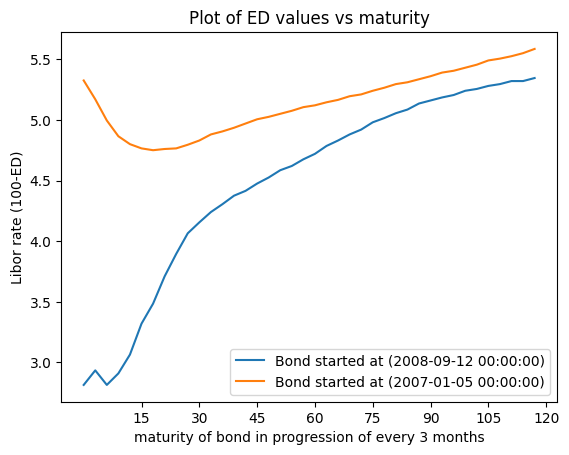

In [ ]:
# Yield curve at two different dates
#select both dates which are the working days in US market
date1= pd.to_datetime('2008-09-12')
date2=pd.to_datetime('2007-01-05')
prices1=[]
prices2=[]
for i in range (0,data.shape[1],6):
  row1=data[data.iloc[:,i]==date1].index.values
  if row1:
   prices1.append(100-data.iloc[row1,i+1])
  row2=data[data.iloc[:,i]==date2].index.values
  if row2:
    prices2.append(100-data.iloc[row2,i+1])
# Create figure and axes
fig, ax = plt.subplots()

# Set x-axis interval to 3 points
#ax.set_xticks(np.arange(3,40))
#ax.set_xticklabels(np.arange(3,121,3))
# Plot the data
ax.plot(prices1, label='Bond started at ({})'.format(date1))
ax.plot(prices2, label='Bond started at ({})'.format(date2))
plt.xticks(ticks=plt.xticks()[0][2:-1], labels=3 * np.array(plt.xticks()[0][2:-1], dtype=np.int64))

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('maturity of bond in progression of every 3 months')
ax.set_ylabel('Libor rate (100-ED)')
ax.set_title('Plot of ED values vs maturity')

# Display the plot
plt.show()

In [ ]:
# import the orginal dataset of fed containing the actual rates
import pandas as pd
df=pd.read_excel('/content/economic.xlsx')
df

,TIMESTAMP,Retail Sales Ex-Autos MM,Retail Sales MM,Building Permits: Number,Consumer Confidence,ISM Manufacturing PMI,ISM N-Mfg PMI,Core PCE MM,Core PCE YY,PCE MM,...,"CPI YY, NSA",Unemployment Rate,Average Earnings MM,Average Earnings YY,Average Workweek Hrs,Non-Farm Payrolls,Fed Rate Lower bound,Fed Rate Upper bound,Indicators,GDP Final
0,2023-05-31,NaN,NaN,NaN,102.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.25,2023-03-31,NaN
1,2023-04-30,0.4,0.4,1416000.0,103.7,47.1,51.9,0.4,4.7,0.4,...,4.9,3.4,0.5,4.4,34.4,253000.0,4.75,5.00,2022-12-31,2.6
2,2023-03-31,-0.5,-0.7,1413000.0,104.0,46.3,51.2,0.3,4.6,0.1,...,5.0,3.5,0.3,4.3,34.4,165000.0,4.75,5.00,2022-09-30,3.2
3,2023-02-28,-0.5,-0.7,1524000.0,103.4,47.7,55.1,0.4,4.7,0.3,...,6.0,3.6,0.3,4.7,34.5,248000.0,4.50,4.75,2022-06-30,-0.6
4,2023-01-31,1.9,2.8,1339000.0,106.0,47.4,55.2,0.6,4.7,0.6,...,6.4,3.4,0.3,4.4,34.6,472000.0,4.25,4.50,2022-03-31,-1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1981-03-31,NaN,NaN,NaN,77.8,49.6,NaN,0.6,9.1,0.7,...,10.5,7.4,NaN,NaN,NaN,105000.0,NaN,NaN,NaT,NaN
507,1981-02-28,NaN,NaN,NaN,69.0,48.8,NaN,0.7,9.5,1.0,...,11.4,7.4,NaN,NaN,NaN,72000.0,NaN,NaN,NaT,NaN
508,1981-01-31,NaN,NaN,NaN,74.4,49.2,NaN,0.9,9.8,1.0,...,11.8,7.5,NaN,NaN,NaN,90000.0,NaN,NaN,NaT,NaN
509,1980-12-31,NaN,NaN,NaN,78.6,53.0,NaN,0.6,9.6,0.6,...,12.5,7.2,NaN,NaN,NaN,196000.0,NaN,NaN,NaT,NaN


In [ ]:
df_sorted = df.sort_values('TIMESTAMP', ascending=True)
# Create a compressed dataset which containes fed rate lower bound and the differences of rates at corresponding dates
# Optional: Reset the index if needed
df_sorted.reset_index(drop=True, inplace=True)
df_sorted['mean_rate']=df_sorted[['Fed Rate Lower bound','Fed Rate Upper bound']].mean(axis=1)
df_rate=df_sorted[['TIMESTAMP','mean_rate']].copy()
df_rate['lag']=df_rate['mean_rate'].diff()
df_rate

,TIMESTAMP,mean_rate,lag
0,1980-11-30,NaN,NaN
1,1980-12-31,NaN,NaN
2,1981-01-31,NaN,NaN
3,1981-02-28,NaN,NaN
4,1981-03-31,NaN,NaN
...,...,...,...
506,2023-01-31,4.375,0.00
507,2023-02-28,4.625,0.25
508,2023-03-31,4.875,0.25
509,2023-04-30,4.875,0.00


In [ ]:
# change this end-date to manage from which date we need to biuld the forward curve and yield curve- choose only working date
end_date=pd.to_datetime('2007-01-05')


In [ ]:
# address storing the libor rate at each maturity of given end_date till 12 maturity
occurence=[]
for i in range (0,data.shape[1],6):
  row1=data[data.iloc[:,i]==end_date].index.values
  if row1:
    occurence.append((row1[0],i))
print(occurence)
#if Empty list printed, it means that date chosen is not working date

[(1777, 168), (1774, 174), (1774, 180), (1774, 186), (1773, 192), (1772, 198), (1772, 204), (1771, 210), (1769, 216), (1770, 222), (1769, 228), (1769, 234), (1719, 240), (1651, 246), (1588, 252), (1524, 258), (1463, 264), (1399, 270), (1337, 276), (1273, 282), (1212, 288), (1149, 294), (1086, 300), (1022, 306), (961, 312), (898, 318), (835, 324), (772, 330), (710, 336), (641, 342), (584, 348), (521, 354), (458, 360), (395, 366), (327, 372), (263, 378), (208, 384), (139, 390), (76, 396), (12, 402)]


<ipython-input-220-9fae8bece6b6>:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:


In [ ]:
# ED yield curve for next 12 maturity
def yield_curve():
  prices1=[]
  for i in range (0,data.shape[1],6):
   row1=data[data.iloc[:,i]==end_date].index.values
   if row1:
    prices1.append(100-data.iloc[row1,i+1])
   if len(prices1)==12:
    break
  return prices1

In [ ]:
# this function returns the parameter for interest rate model
def parameter(libor_rates,differences):
  x=np.array(libor_rates)
  y=np.array(differences)
  slope,intercept=np.polyfit(x.astype(float),y.astype(float),1)
 # calculate volatility
  residuals = y - (slope * x + intercept)
  n = len(y)  # number of data points
  dof = n - 2  # degrees of freedom
  MSE = np.sum(residuals ** 2) / dof  # mean squared error
  vol= np.sqrt(MSE)
  a=-slope
  b=intercept/a
  return a,b,vol

In [ ]:
# collecting the data for training of model.
#select number of days prevoius to given date to train
train_days=30
A=[]
B=[]
sigma=[]
for i in range (0,12):
  mean_rates=[]
  count=0
  col=occurence[i][1]
  for j in range (occurence[i][0]-1,0,-1):
    if count >train_days:
      break
    count=count+1
    mean_rates.append(100-data.iloc[j,col+1])
  if count <= train_days and col !=1:
    col=col-6
    last_row_index = df.iloc[:, col].last_valid_index()
    for j in range(last_row_index,0,-1):
      if count> train_days:
        break
      count=count+1
      mean_rates.append(100-data.iloc[j,col+1])
  differences = pd.Series(mean_rates).diff().tolist()[1:]
  mean_rates.pop()
  a,b,vol=parameter(mean_rates,differences)
  A.append(a)
  B.append(b)
  sigma.append(vol)
print(A,B,sigma)

[0.08577694988583295, 0.10064941815737255, 0.10346945509964872, 0.11415363651260141, 0.11219880662197008, 0.11000727249659507, 0.11261157240535133, 0.11468824261627597, 0.11754759355496326, 0.11667169128730892, 0.11599443470195585, 0.11569019719919878] [5.240236427320484, 5.066876348528672, 4.879779426675272, 4.750953271381082, 4.688347874871835, 4.674226872065243, 4.6756934290299625, 4.691839171188952, 4.714845320744234, 4.747023255813954, 4.77372462047854, 4.813262516469036] [0.02397942274632819, 0.049165387629214324, 0.054601450848537514, 0.053994391758066654, 0.053699264949884654, 0.05309540124374003, 0.05171142293893519, 0.04924777570646178, 0.04718476573790238, 0.04504332726172311, 0.04405338825662041, 0.042240681422705394]


<ipython-input-221-5f40e668f205>:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:


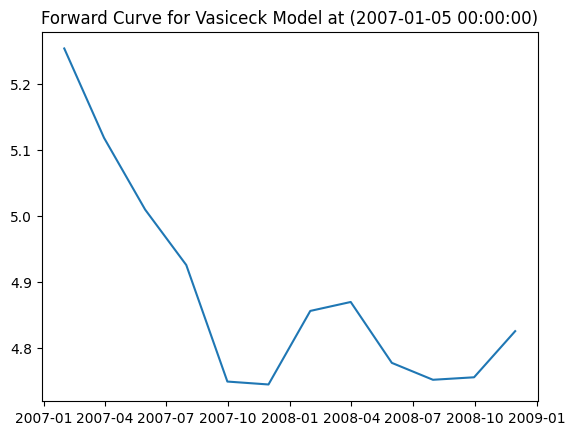

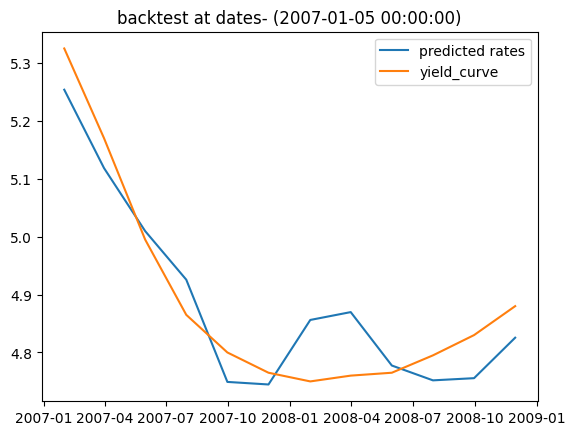

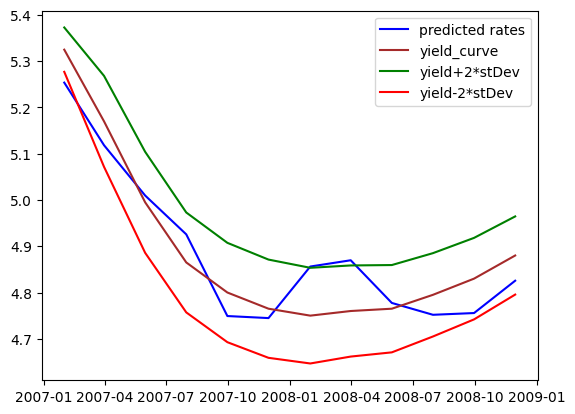

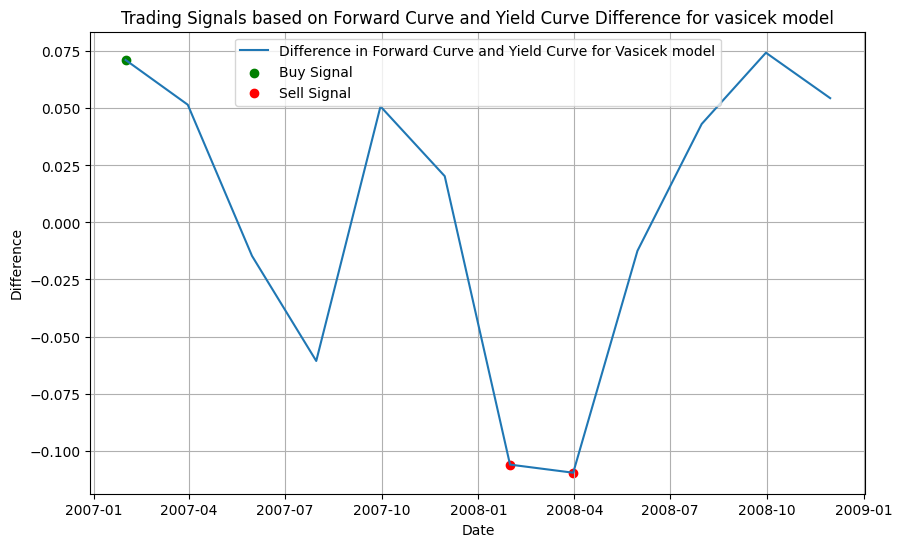

In [ ]:
# Code for applying Vasiceck model
#build model
ya=(df_rate['TIMESTAMP']-end_date).abs().idxmin()+1
original_yield=yield_curve()
original_yield = [series.values for series in original_yield]

r0=df_rate.iloc[ya,1]
r=r0
random_list = np.random.normal(0,1,12)
pred_rates=[]
for i in range (0,12):
  r=B[i]*A[i]*3-r*A[i]*3+sigma[i]*random_list[i]+r
  pred_rates.append(r)
dates=pd.date_range(end_date, periods=12, freq='2M')
plt.title('Forward Curve for Vasiceck Model at ({})'.format(end_date))
plt.plot(dates,pred_rates)
plt.show()

# backtest graph at this date

plt.title('backtest at dates- ({})'.format(end_date))
plt.plot(dates,pred_rates,label='predicted rates')
plt.plot(dates,original_yield,label='yield_curve')
plt.legend()
plt.show()
mean_vol=np.mean(np.array(sigma))
delta=[]
for i in range (0,12):
  delta.append(original_yield[i]-pred_rates[i])

# Generate trading signals

signals = np.zeros(len(delta))
threshold=np.mean(np.array(delta))
signals=np.zeros(len(delta))
for i in range(0, 12):
    if delta[i] > 2*sigma[i]:
        signals[i]=1  # Generate a buy signal
    elif delta[i] < -2*sigma[i]:
        signals[i]=-1  # Generate a sell signal

yield_plus=[]
yield_minus=[]
for i in range (0,12):
  yield_plus.append(original_yield[i]+2*sigma[i])
  yield_minus.append(original_yield[i]-2*sigma[i])
plt.plot(dates,pred_rates,color='blue',label='predicted rates')
plt.plot(dates,original_yield,color='brown',label='yield_curve')
plt.plot(dates,yield_plus,color='green',label='yield+2*stDev')
plt.plot(dates,yield_minus,color='red',label='yield-2*stDev')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
signals = signals.astype(int)
dates=np.array(dates)
delta=np.array(delta)
plt.plot(dates, delta, label='Difference in Forward Curve and Yield Curve for Vasicek model')
plt.scatter(dates[signals == 1], delta[signals == 1], color='green', label='Buy Signal')
plt.scatter(dates[signals == -1], delta[signals == -1], color='red', label='Sell Signal')
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Trading Signals based on Forward Curve and Yield Curve Difference for vasicek model')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-221-5f40e668f205>:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:


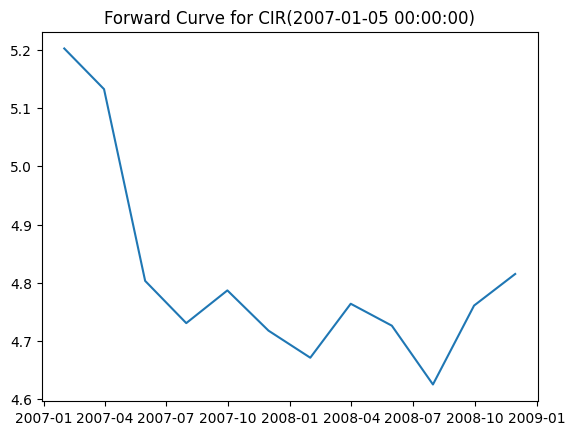

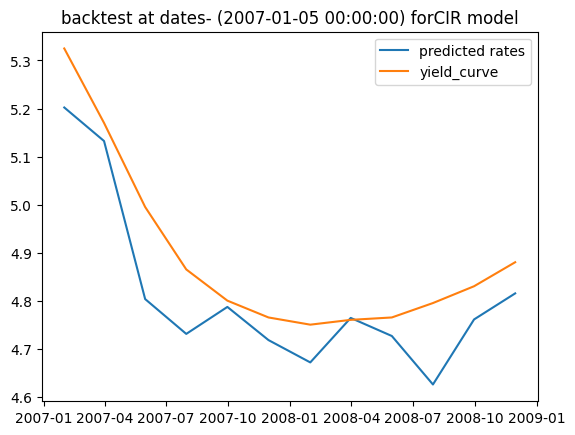

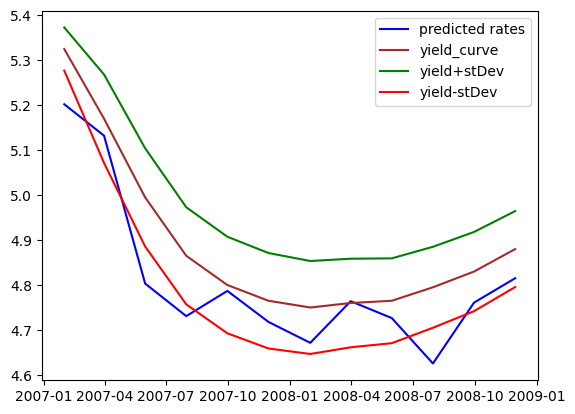

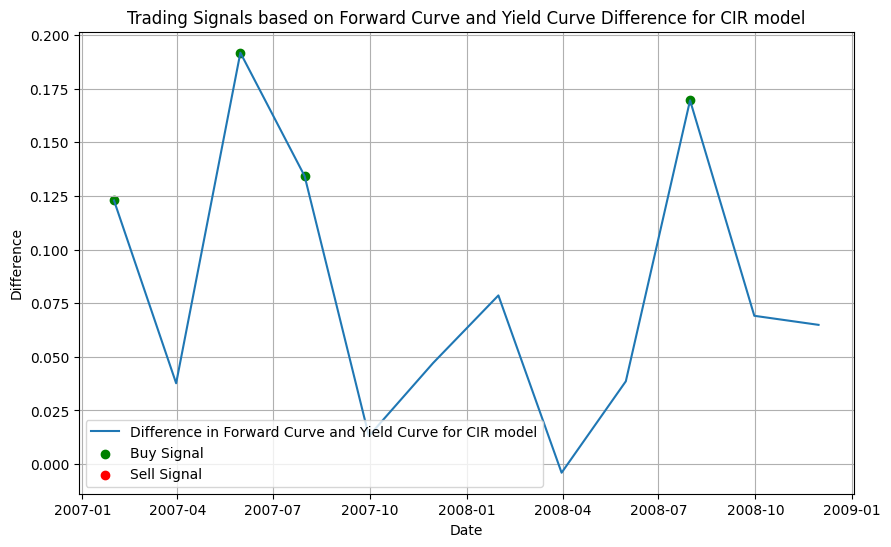

In [ ]:
# Code for applying CIR model
#build model
ya=(df_rate['TIMESTAMP']-end_date).abs().idxmin()+1
original_yield=yield_curve()
original_yield = [series.values for series in original_yield]

r0=df_rate.iloc[ya,1]
r=r0
random_list = np.random.normal(0,1,12)
pred_rates=[]
for i in range (0,12):
  r=B[i]*A[i]*3-r*A[i]*3+sigma[i]*random_list[i]*np.sqrt(r)+r
  pred_rates.append(r)
dates=pd.date_range(end_date, periods=12, freq='2M')
plt.title('Forward Curve for CIR({})'.format(end_date))
plt.plot(dates,pred_rates)
plt.show()
# backtest graph at this date

plt.title('backtest at dates- ({}) forCIR model'.format(end_date))
plt.plot(dates,pred_rates,label='predicted rates')
plt.plot(dates,original_yield,label='yield_curve')
plt.legend()
plt.show()
mean_vol=np.mean(np.array(sigma))
#generate signal
delta=[]
for i in range (0,12):
  delta.append(original_yield[i]-pred_rates[i])
# Generate trading signals
signals = np.zeros(len(delta))
threshold=np.mean(np.array(delta))
signals=np.zeros(len(delta))
for i in range(0, 12):
    if delta[i] > 2*sigma[i]:
        signals[i]=1  # Generate a buy signal
    elif delta[i] < -2*sigma[i]:
        signals[i]=-1  # Generate a sell signal

yield_plus=[]
yield_minus=[]
for i in range (0,12):
  yield_plus.append(original_yield[i]+2*sigma[i])
  yield_minus.append(original_yield[i]-2*sigma[i])
plt.plot(dates,pred_rates,color='blue',label='predicted rates')
plt.plot(dates,original_yield,color='brown',label='yield_curve')
plt.plot(dates,yield_plus,color='green',label='yield+stDev')
plt.plot(dates,yield_minus,color='red',label='yield-stDev')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
signals = signals.astype(int)
dates=np.array(dates)
delta=np.array(delta)
plt.plot(dates, delta, label='Difference in Forward Curve and Yield Curve for CIR model')
plt.scatter(dates[signals == 1], delta[signals == 1], color='green', label='Buy Signal')
plt.scatter(dates[signals == -1], delta[signals == -1], color='red', label='Sell Signal')
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Trading Signals based on Forward Curve and Yield Curve Difference for CIR model')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-221-5f40e668f205>:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:


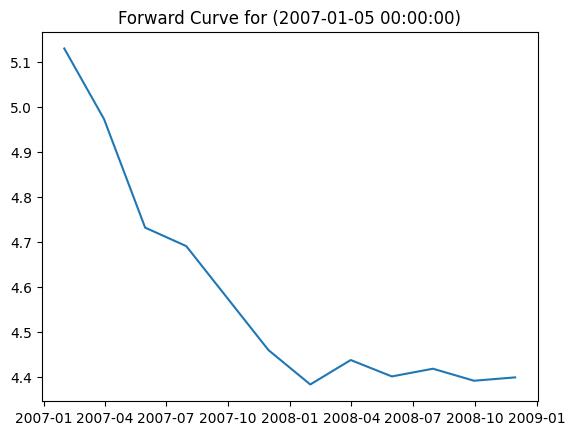

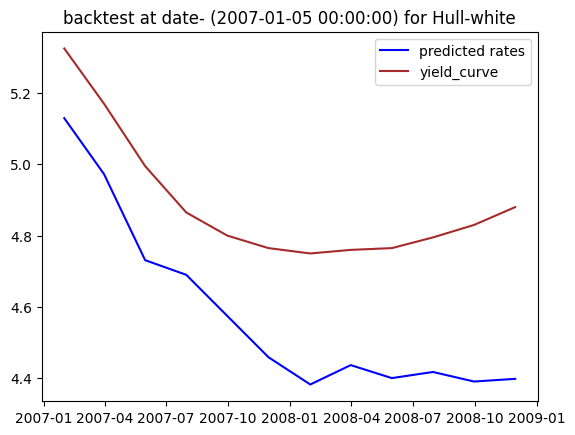

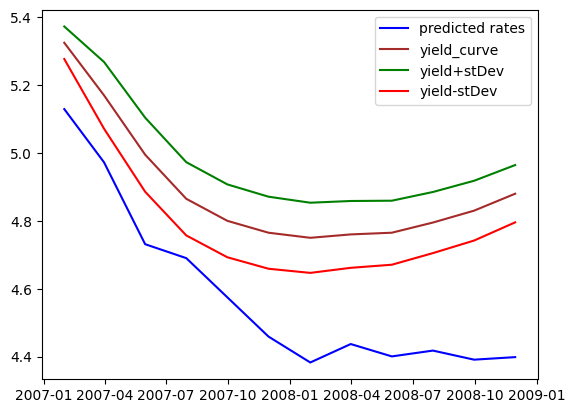

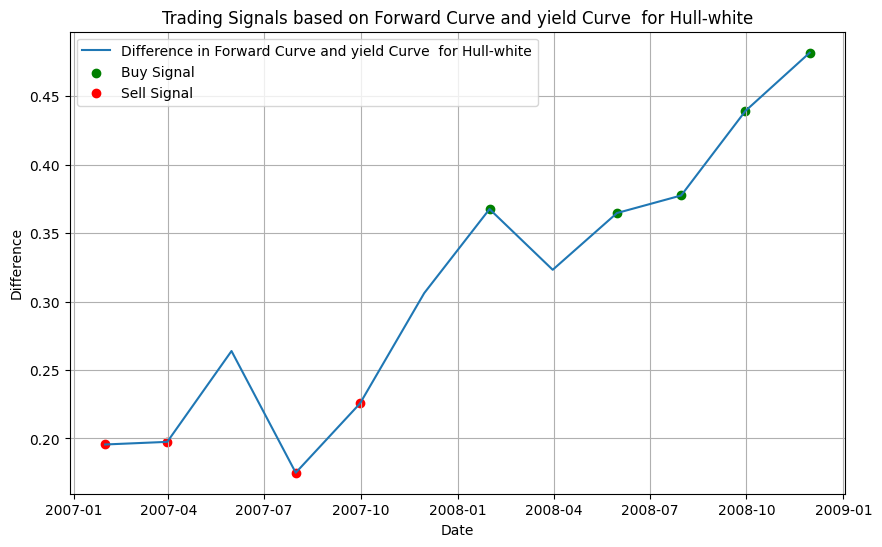

In [ ]:
# Code for applying hull white model
#build model
ya=(df_rate['TIMESTAMP']-end_date).abs().idxmin()+1
original_yield=yield_curve()
original_yield = [series.values for series in original_yield]
r0=df_rate.iloc[ya,1]
r=r0
random_list = np.random.normal(0,1,12)
pred_rates=[]
for i in range (0,12):
  r=(B[i]-r)*A[i]*3+sigma[i]*random_list[i]-A[i]*r/4+r
  pred_rates.append(r)
dates=pd.date_range(end_date, periods=12, freq='2M')
plt.title('Forward Curve for ({})'.format(end_date))
plt.plot(dates,pred_rates)
plt.show()
# backtest graph at this date

plt.title('backtest at date- ({}) for Hull-white'.format(end_date))
plt.plot(dates,pred_rates,color='blue',label='predicted rates')
plt.plot(dates,original_yield,color='brown',label='yield_curve')
plt.legend()
plt.show()
mean_vol=np.mean(np.array(sigma))
yield_plus=[]
yield_minus=[]
for i in range (0,12):
  yield_plus.append(original_yield[i]+2*sigma[i])
  yield_minus.append(original_yield[i]-2*sigma[i])
plt.plot(dates,pred_rates,color='blue',label='predicted rates')
plt.plot(dates,original_yield,color='brown',label='yield_curve')
plt.plot(dates,yield_plus,color='green',label='yield+stDev')
plt.plot(dates,yield_minus,color='red',label='yield-stDev')
plt.legend()
plt.show()
#generate signal
delta=[]
for i in range (0,12):
  delta.append(original_yield[i]-pred_rates[i])
# Generate trading signals
signals = np.zeros(len(delta))
threshold=np.mean(np.array(delta))
signals=np.zeros(len(delta))

for i in range(0, 12):
    if delta[i] > threshold+sigma[i]:
        signals[i]=1  # Generate a buy signal
    elif delta[i] < threshold-sigma[i]:
        signals[i]=-1  # Generate a sell signal

plt.figure(figsize=(10, 6))
signals = signals.astype(int)
dates=np.array(dates)
delta=np.array(delta)
plt.plot(dates, delta, label='Difference in Forward Curve and yield Curve  for Hull-white')
plt.scatter(dates[signals == 1], delta[signals == 1], color='green', label='Buy Signal')
plt.scatter(dates[signals == -1], delta[signals == -1], color='red', label='Sell Signal')
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Trading Signals based on Forward Curve and yield Curve  for Hull-white')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-221-5f40e668f205>:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:


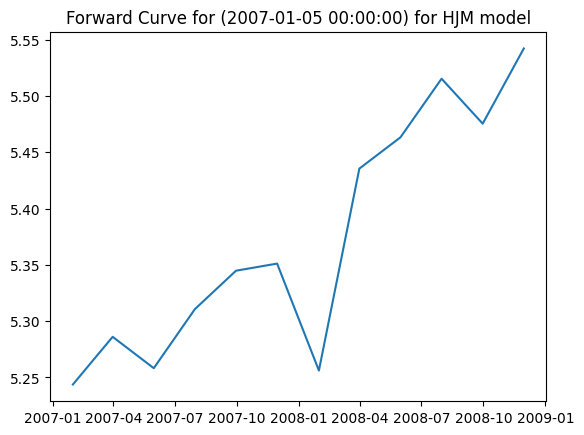

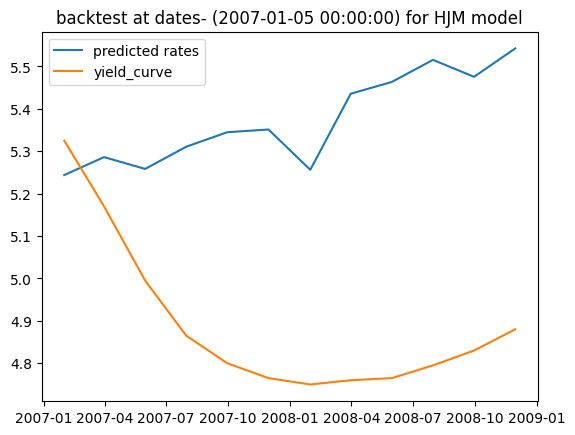

0.04733472337500997


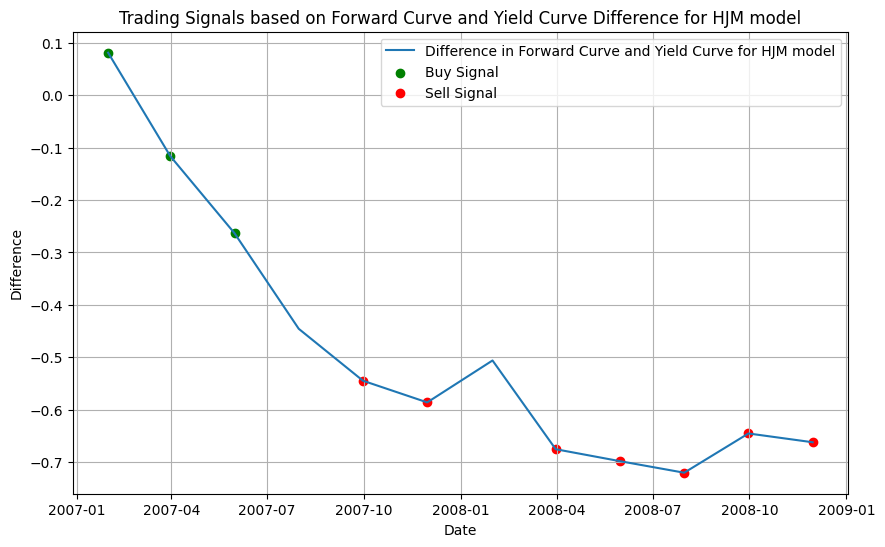

In [ ]:
# Code for applying HJM model
#build model
ya=(df_rate['TIMESTAMP']-end_date).abs().idxmin()+1
original_yield=yield_curve()
original_yield = [series.values for series in original_yield]

r0=df_rate.iloc[ya,1]
r=r0
random_list = np.random.normal(0,1,12)
pred_rates=[]
for i in range (0,12):
  r=r0+sigma[i]*sigma[i]*i*i/2*3+sigma[i]*random_list[i]
  pred_rates.append(r)
dates=pd.date_range(end_date, periods=12, freq='2M')
plt.title('Forward Curve for ({}) for HJM model'.format(end_date))
plt.plot(dates,pred_rates)
plt.show()
# backtest graph at this date

plt.title('backtest at dates- ({}) for HJM model'.format(end_date))
plt.plot(dates,pred_rates,label='predicted rates')
plt.plot(dates,original_yield,label='yield_curve')
plt.legend()
plt.show()
mean_vol=np.mean(np.array(sigma))
print(mean_vol)
#generate signal
delta=[]
for i in range (0,12):
  delta.append(original_yield[i]-pred_rates[i])
# Generate trading signals
signals = np.zeros(len(delta))
threshold=np.mean(np.array(delta))
signals=np.zeros(len(delta))


for i in range(0, 12):
    if delta[i] > threshold+mean_vol:
        signals[i]=1  # Generate a buy signal
    elif delta[i] < threshold-mean_vol:
        signals[i]=-1  # Generate a sell signal

plt.figure(figsize=(10, 6))
signals = signals.astype(int)
dates=np.array(dates)
delta=np.array(delta)
plt.plot(dates, delta, label='Difference in Forward Curve and Yield Curve for HJM model')
plt.scatter(dates[signals == 1], delta[signals == 1], color='green', label='Buy Signal')
plt.scatter(dates[signals == -1], delta[signals == -1], color='red', label='Sell Signal')
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Trading Signals based on Forward Curve and Yield Curve Difference for HJM model')
plt.legend()
plt.grid(True)
plt.show()